<a href="https://colab.research.google.com/github/areegtarek/Emotion-Recognition-using-BERT/blob/main/Emotion_Dataset_for_Emotion_Recognition_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Emotion Dataset for Emotion Recognition Tasks**

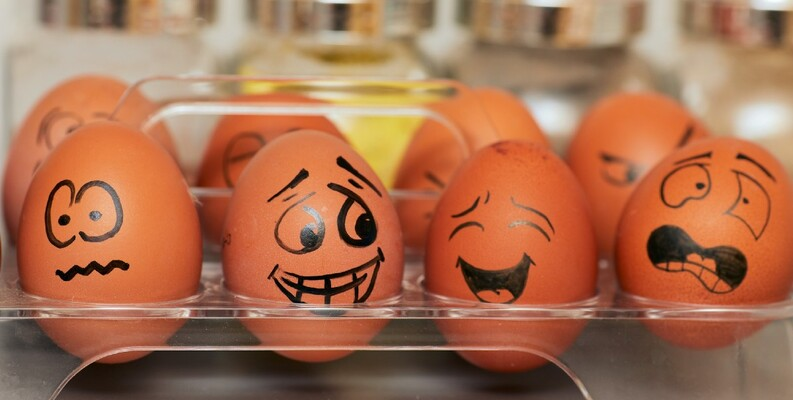

A dataset of English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise. For more detailed information please refer to the paper below.


The authors constructed a set of hashtags to collect a separate dataset of English tweets from the Twitter API belonging to eight basic emotions, including anger, anticipation, disgust, fear, joy, sadness, surprise, and trust. The data has already been preprocessed based on the approach described in their paper.

- Homepage: https://github.com/dair-ai/emotion_dataset
- Paper: CARER: Contextualized Affect Representations for Emotion Recognition

An example of 'train' looks as follows.
      
      {
        "label": 0,
        "text": "im feeling quite sad and sorry for myself but ill snap out of it soon"
      }

In [ ]:
!pip install datasets

  Using cached datasets-2.13.1-py3-none-any.whl (486 kB)
  Using cached xxhash-3.2.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (212 kB)
  Using cached multiprocess-0.70.14-py39-none-any.whl (132 kB)
  Using cached huggingface_hub-0.15.1-py3-none-any.whl (236 kB)


In [ ]:
!pip install transformers

  Using cached transformers-4.30.2-py3-none-any.whl (7.2 MB)
  Using cached regex-2023.6.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (769 kB)
  Using cached tokenizers-0.13.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
  Using cached safetensors-0.3.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)


In [ ]:
!pip install pytorch-pretrained-bert

  Using cached pytorch_pretrained_bert-0.6.2-py3-none-any.whl (123 kB)
  Using cached boto3-1.26.160-py3-none-any.whl (135 kB)
  Using cached botocore-1.29.160-py3-none-any.whl (10.9 MB)
  Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
  Using cached s3transfer-0.6.1-py3-none-any.whl (79 kB)


In [ ]:
!pip install wordcloud

  Using cached wordcloud-1.9.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (460 kB)


In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizer, AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the required libraries and the 'distilbert-base-uncased' model
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, get_linear_schedule_with_warmup

from datasets import load_dataset
from wordcloud import WordCloud

#Set visualization style
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
matplotlib.rcParams['figure.figsize'] = 12, 8

#Define a custom color palette using the husl palette
sns.color_palette('husl', n_colors=7)

2023-06-25 23:00:41.720365: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 23:00:42.416675: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7757319041862729, 0.5784925270759935, 0.19475566538551875),
 (0.5105309046900421, 0.6614299289084904, 0.1930849118538962),
 (0.20433460114757862, 0.6863857739476534, 0.5407103379425205),
 (0.21662978923073606, 0.6676586160122123, 0.7318695594345369),
 (0.5049017849530067, 0.5909119231215284, 0.9584657252128558),
 (0.9587050080494409, 0.3662259565791742, 0.9231469575614251)]

Lab 3 aims to practice usage of hugging face and fine tune transformers for classification task.
The dataset is the emotions from hugging face.

https://huggingface.co/datasets/dair-ai/emotion

This lab contains 3 tasks.

Question 1: Load in the emotions dataset and provide basic statistics of the dataset. Specifically your code should answer:

1) How many tweets (sentences) was used to train, test and validation?
2) Show 5 samples from the dataset
3) What are the target predict labels?
4) What are the distributions of labels in train, test, and validation (visualize the results using plots)
5) Analyze the words per tweet in the train, test, validation.

In [ ]:
# Load the dataset
dataset = load_dataset('dair-ai/emotion')

No config specified, defaulting to: emotion/split
Found cached dataset emotion (/home/jovyan/.cache/huggingface/datasets/dair-ai___emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# Get the number of sentences in train, test, and validation splits
train_size = len(dataset['train'])
test_size = len(dataset['test'])
val_size = len(dataset['validation'])

print("Number of sentences in train split:", train_size)
print("Number of sentences in test split:", test_size)
print("Number of sentences in validation split:", val_size)

Number of sentences in train split: 16000
Number of sentences in test split: 2000
Number of sentences in validation split: 2000


In [ ]:
# Convert each split to a pandas dataframe
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])
val_df = pd.DataFrame(dataset['validation'])

# Print the first 5 rows of each dataframe
print("Train dataframe:")
print(train_df.head())
print("\nTest dataframe:")
print(test_df.head())
print("\nValidation dataframe:")
print(val_df.head())

Train dataframe:
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

Test dataframe:
                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me because i do...      0
3  i left with my bouquet of red and yellow tulip...      1
4    i was feeling a little vain when i did this one      0

Validation dataframe:
                                                text  label
0  im feeling quite sad and sorry for myself but ...      0
1  i feel like i am still looking at a blank canv...      0
2                     i feel like a faithfu

In [ ]:
# Check for null values
print("Null values in train_df:", train_df.isnull().values.any())
print("Null values in test_df:", test_df.isnull().values.any())
print("Null values in val_df:", val_df.isnull().values.any())

Null values in train_df: False
Null values in test_df: False
Null values in val_df: False


In [ ]:
# Check for duplicates
print("Duplicate rows in train_df:", train_df.duplicated().sum())
print("Duplicate rows in test_df:", test_df.duplicated().sum())
print("Duplicate rows in val_df:", val_df.duplicated().sum())

Duplicate rows in train_df: 1
Duplicate rows in test_df: 0
Duplicate rows in val_df: 0


In [ ]:
# Drop the duplicate row in train_df
train_df = train_df.drop_duplicates()

# Confirm that the duplicate row has been dropped
print("Duplicate rows in train_df:", train_df.duplicated().sum())

Duplicate rows in train_df: 0


In [ ]:
# Get the target prediction labels from the train dataframe
train_df['label'].unique()

array([0, 3, 2, 5, 4, 1])

In [ ]:
# Define a new labels_dict
labels_dict = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise', 6: 'neutral'}

# Map the labels in the 'label' column to the corresponding emotions using the labels_dict for all three dataframes
train_df['description'] = train_df['label'].map(labels_dict)
test_df['description'] = test_df['label'].map(labels_dict)
val_df['description'] = val_df['label'].map(labels_dict)

# Print the first few rows of the modified dataframes
print(train_df.head())
print(test_df.head())
print(val_df.head())

                                                text  label description
0                            i didnt feel humiliated      0     sadness
1  i can go from feeling so hopeless to so damned...      0     sadness
2   im grabbing a minute to post i feel greedy wrong      3       anger
3  i am ever feeling nostalgic about the fireplac...      2        love
4                               i am feeling grouchy      3       anger
                                                text  label description
0  im feeling rather rotten so im not very ambiti...      0     sadness
1          im updating my blog because i feel shitty      0     sadness
2  i never make her separate from me because i do...      0     sadness
3  i left with my bouquet of red and yellow tulip...      1         joy
4    i was feeling a little vain when i did this one      0     sadness
                                                text  label description
0  im feeling quite sad and sorry for myself but ...      0     

In [ ]:
# Get the label distributions for each split
train_label_counts = train_df['description'].value_counts()
test_label_counts = test_df['description'].value_counts()
val_label_counts = val_df['description'].value_counts()

# Print the label distributions
print("Train label distribution:")
print(train_label_counts)
print("\nTest label distribution:")
print(test_label_counts)
print("\nValidation label distribution:")
print(val_label_counts)

Train label distribution:
description
joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

Test label distribution:
description
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64

Validation label distribution:
description
joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: count, dtype: int64


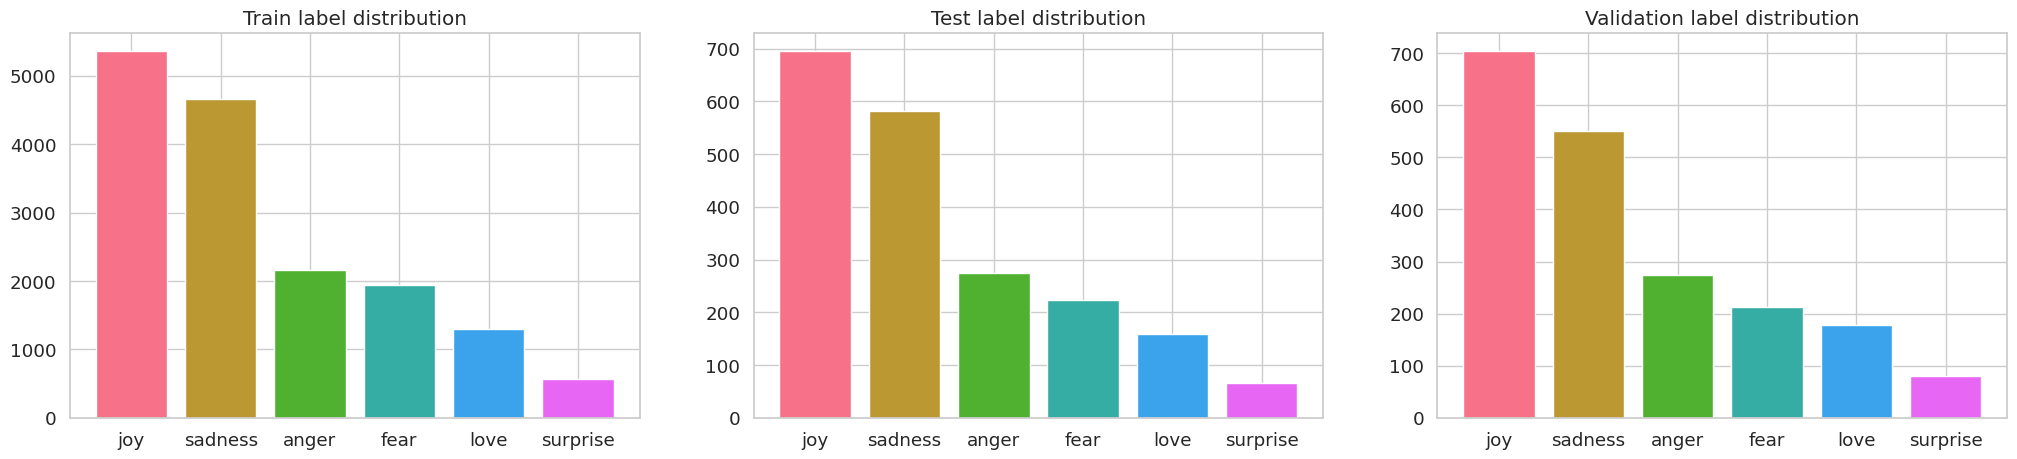

In [ ]:
# Define a custom color palette
palette_color = sns.color_palette('husl')
# Define a custom color palette
#custom_palette = ['#FF6666', '#FFB266', '#FFFF66', '#66FF66', '#66FFFF', '#6666FF', '#FF66FF']

# Create bar plots for the label distributions in each split
fig, ax = plt.subplots(1, 3, figsize=(25, 5))
ax[0].bar(train_label_counts.index, train_label_counts.values, color=palette_color)
ax[0].set_title("Train label distribution")
ax[1].bar(test_label_counts.index, test_label_counts.values, color=palette_color)
ax[1].set_title("Test label distribution")
ax[2].bar(val_label_counts.index, val_label_counts.values, color=palette_color)
ax[2].set_title("Validation label distribution")
plt.show()

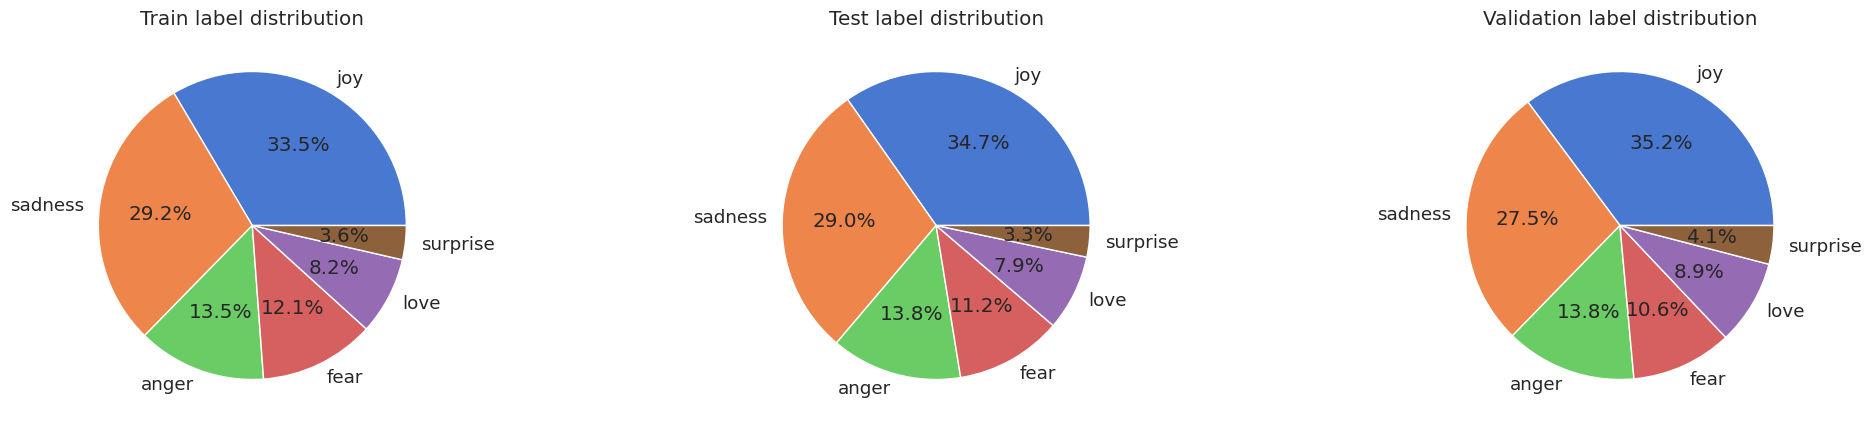

In [ ]:
# Plot pie charts of the label distributions for each split
fig, ax = plt.subplots(1, 3, figsize=(25, 5))
ax[0].pie(train_label_counts.values, labels=train_label_counts.index, autopct='%1.1f%%')
ax[0].set_title("Train label distribution")
ax[1].pie(test_label_counts.values, labels=test_label_counts.index, autopct='%1.1f%%')
ax[1].set_title("Test label distribution")
ax[2].pie(val_label_counts.values, labels=val_label_counts.index, autopct='%1.1f%%')
ax[2].set_title("Validation label distribution")
plt.show()

In [ ]:
# Add a new column to each dataframe containing the number of words in each tweet
train_df['num_words'] = train_df['text'].apply(lambda x: len(x.split()))
test_df['num_words'] = test_df['text'].apply(lambda x: len(x.split()))
val_df['num_words'] = val_df['text'].apply(lambda x: len(x.split()))

In [ ]:
train_df

,text,label,description,num_words
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness,24
15996,i am now turning and i feel pathetic that i am...,0,sadness,20
15997,i feel strong and good overall,1,joy,6
15998,i feel like this was such a rude comment and i...,3,anger,14


In [ ]:
# Generate descriptive statistics for each dataframe
train_stats = train_df.describe()
test_stats = test_df.describe()
val_stats = val_df.describe()

# Print the descriptive statistics
print("Train dataframe statistics:")
print(train_stats)
print("\nTest dataframe statistics:")
print(test_stats)
print("\nValidation dataframe statistics:")
print(val_stats)

Train dataframe statistics:
              label     num_words
count  15999.000000  15999.000000
mean       1.565973     19.166760
std        1.501471     10.987102
min        0.000000      2.000000
25%        0.000000     11.000000
50%        1.000000     17.000000
75%        3.000000     25.000000
max        5.000000     66.000000

Test dataframe statistics:
            label    num_words
count  2000.00000  2000.000000
mean      1.53200    19.154000
std       1.47447    11.012353
min       0.00000     3.000000
25%       0.00000    10.000000
50%       1.00000    17.000000
75%       3.00000    26.000000
max       5.00000    61.000000

Validation dataframe statistics:
             label    num_words
count  2000.000000  2000.000000
mean      1.569000    18.866000
std       1.480991    10.813025
min       0.000000     2.000000
25%       0.000000    10.000000
50%       1.000000    17.000000
75%       3.000000    25.000000
max       5.000000    61.000000


In [ ]:
# Analyze the words per tweet in each split
train_mean_words = train_df['num_words'].mean()
test_mean_words = test_df['num_words'].mean()
val_mean_words = val_df['num_words'].mean()

# Print the mean, maximum, and minimum number of words per tweet for each split
print("Words per tweet:")
print(f"Train: mean={train_mean_words:.2f}, max={train_df['num_words'].max()}, min={train_df['num_words'].min()}")
print(f"Test: mean={test_mean_words:.2f}, max={test_df['num_words'].max()}, min={test_df['num_words'].min()}")
print(f"Validation: mean={val_mean_words:.2f}, max={val_df['num_words'].max()}, min={val_df['num_words'].min()}")

Words per tweet:
Train: mean=19.17, max=66, min=2
Test: mean=19.15, max=61, min=3
Validation: mean=18.87, max=61, min=2


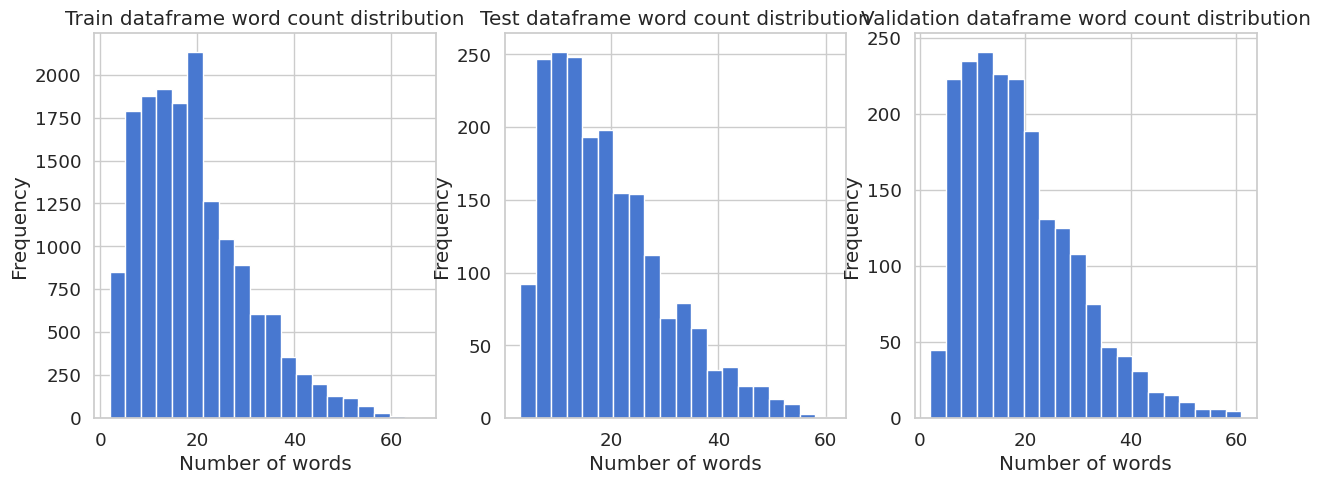

In [ ]:
# Plot histograms of the number of words per tweet in each dataframe
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(train_df['num_words'], bins=20)
ax[0].set_title("Train dataframe word count distribution")
ax[0].set_xlabel("Number of words")
ax[0].set_ylabel("Frequency")
ax[1].hist(test_df['num_words'], bins=20)
ax[1].set_title("Test dataframe word count distribution")
ax[1].set_xlabel("Number of words")
ax[1].set_ylabel("Frequency")
ax[2].hist(val_df['num_words'], bins=20)
ax[2].set_title("Validation dataframe word count distribution")
ax[2].set_xlabel("Number of words")
ax[2].set_ylabel("Frequency")
plt.show()

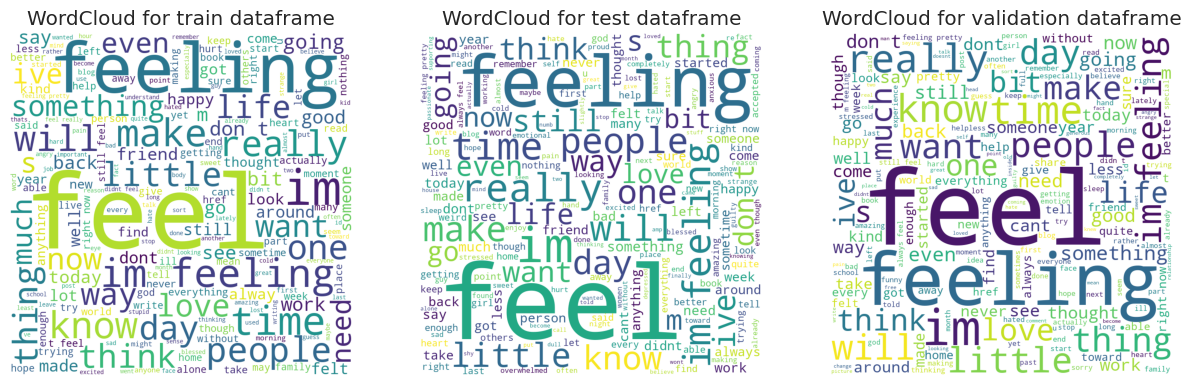

In [ ]:
# Combine all tweets into a single string for each split
train_all_text = ' '.join(train_df['text'])
test_all_text = ' '.join(test_df['text'])
val_all_text = ' '.join(val_df['text'])

# Create WordCloud objects for each split
train_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(train_all_text)
test_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(test_all_text)
val_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(val_all_text)

# Print and plot the WordCloud images for each split
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(train_wordcloud)
ax[0].set_title("WordCloud for train dataframe")
ax[0].axis('off')
ax[1].imshow(test_wordcloud)
ax[1].set_title("WordCloud for test dataframe")
ax[1].axis('off')
ax[2].imshow(val_wordcloud)
ax[2].set_title("WordCloud for validation dataframe")
ax[2].axis('off')
plt.show()

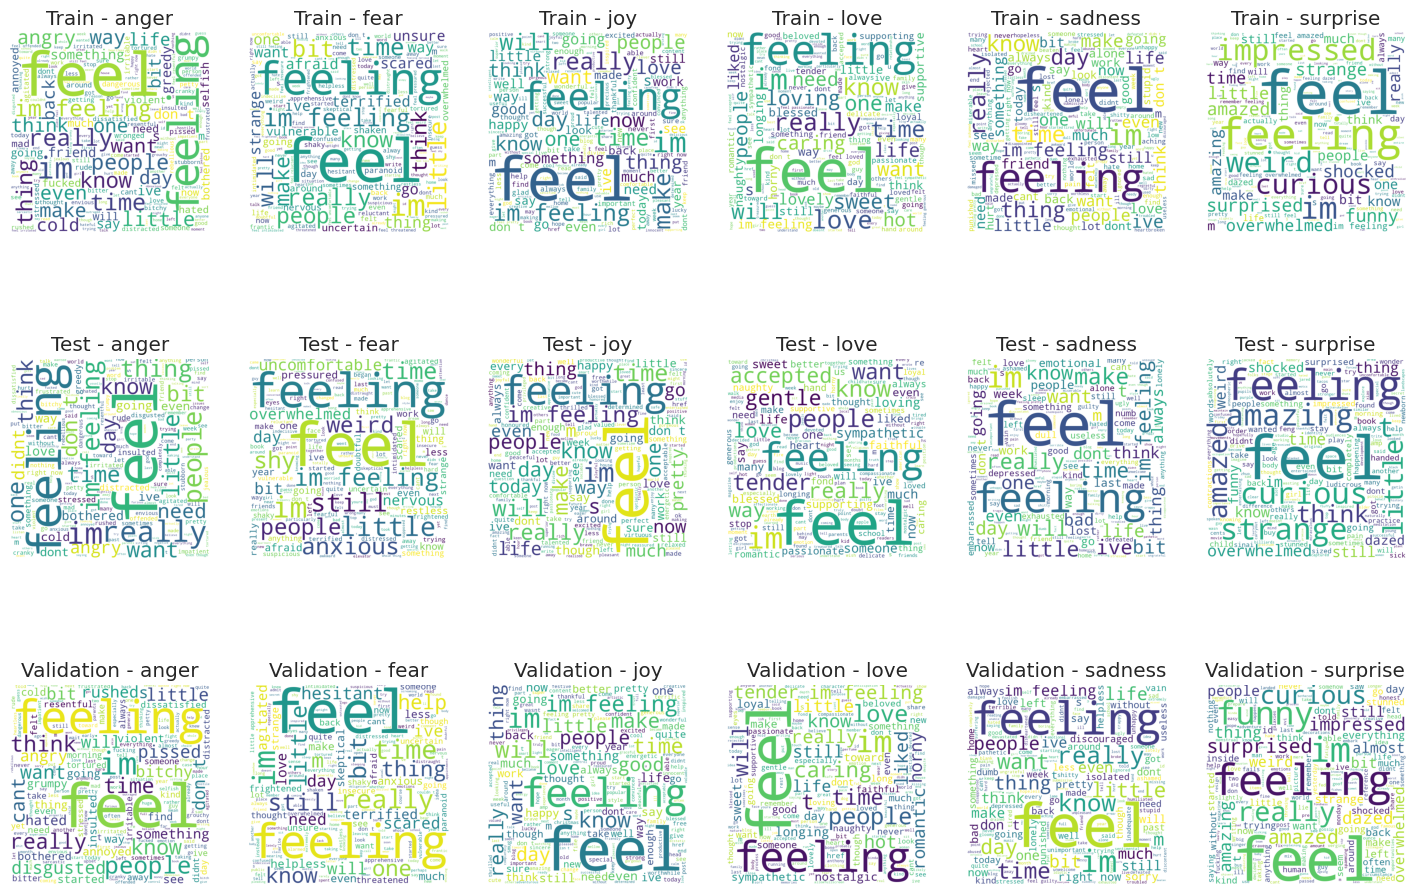

In [ ]:
def create_wordclouds(df):
    # Group the DataFrame by the emotion label
    grouped_df = df.groupby('description')

    # For each emotion label, join all the texts into a single string
    all_text_dict = {}
    for label, group in grouped_df:
        all_text = ' '.join(group['text'])
        all_text_dict[label] = all_text

    # Create a WordCloud object for each emotion label
    wordcloud_dict = {}
    for label, all_text in all_text_dict.items():
        wordcloud = WordCloud(width=800, height=800, background_color='white').generate(all_text)
        wordcloud_dict[label] = wordcloud

    return wordcloud_dict

train_wordcloud_dict = create_wordclouds(train_df)
test_wordcloud_dict = create_wordclouds(test_df)
val_wordcloud_dict = create_wordclouds(val_df)

fig, ax = plt.subplots(3, 6, figsize=(18, 12))
for i, (split_name, wordcloud_dict) in enumerate([('Train', train_wordcloud_dict), ('Test', test_wordcloud_dict), ('Validation', val_wordcloud_dict)]):
    for j, (label, wordcloud) in enumerate(wordcloud_dict.items()):
        row = i
        col = j
        ax[row, col].imshow(wordcloud)
        ax[row, col].set_title(f"{split_name} - {label}")
        ax[row, col].axis('off')
plt.show()



Question 2: Tokenization. Use two different tokenization models provided by hugging face.

For instance:
model_name = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)

For each tokenizer:

Report the tokenizer's vocabulary size.

Present the tokenization results for the two selected tokenizers on three examples.



In [ ]:
# Define the tokenizer models
tokenizer1 = AutoTokenizer.from_pretrained('bert-base-uncased')
tokenizer2 = AutoTokenizer.from_pretrained('distilbert-base-uncased')
tokenizer3 = AutoTokenizer.from_pretrained('gpt2')

In [ ]:
#Define three examples from the training split
text1 = train_df['text'][0]
text2 = train_df['text'][1]
text3 = train_df['text'][2]

# Tokenize the examples using each tokenizer
print("\nTokenization results for tokenizer 1:")
print(tokenizer1.tokenize(text1))
print(tokenizer1.tokenize(text2))
print(tokenizer1.tokenize(text3))

print("\nTokenization results for tokenizer 2:")
print(tokenizer2.tokenize(text1))
print(tokenizer2.tokenize(text2))
print(tokenizer2.tokenize(text3))

print("\nTokenization results for tokenizer 3:")
print(tokenizer3.tokenize(text1))
print(tokenizer3.tokenize(text2))
print(tokenizer3.tokenize(text3))


Tokenization results for tokenizer 1:
['i', 'didn', '##t', 'feel', 'humiliated']
['i', 'can', 'go', 'from', 'feeling', 'so', 'hopeless', 'to', 'so', 'damned', 'hopeful', 'just', 'from', 'being', 'around', 'someone', 'who', 'cares', 'and', 'is', 'awake']
['im', 'grabbing', 'a', 'minute', 'to', 'post', 'i', 'feel', 'greedy', 'wrong']

Tokenization results for tokenizer 2:
['i', 'didn', '##t', 'feel', 'humiliated']
['i', 'can', 'go', 'from', 'feeling', 'so', 'hopeless', 'to', 'so', 'damned', 'hopeful', 'just', 'from', 'being', 'around', 'someone', 'who', 'cares', 'and', 'is', 'awake']
['im', 'grabbing', 'a', 'minute', 'to', 'post', 'i', 'feel', 'greedy', 'wrong']

Tokenization results for tokenizer 3:
['i', 'Ġdidnt', 'Ġfeel', 'Ġhumiliated']
['i', 'Ġcan', 'Ġgo', 'Ġfrom', 'Ġfeeling', 'Ġso', 'Ġhopeless', 'Ġto', 'Ġso', 'Ġdamned', 'Ġhopeful', 'Ġjust', 'Ġfrom', 'Ġbeing', 'Ġaround', 'Ġsomeone', 'Ġwho', 'Ġcares', 'Ġand', 'Ġis', 'Ġawake']
['im', 'Ġgrabbing', 'Ġa', 'Ġminute', 'Ġto', 'Ġpost', 'Ġi',

In tokenization, the special characters Ġ and # have specific meanings depending on the tokenizer used:

- Ġ (U+0120): This special character is used by tokenizers based on the GPT-2 model, such as the GPT-2 tokenizer itself, to indicate the beginning of a word. Specifically, Ġ is inserted at the beginning of each word that is not the first word in a sentence or phrase. For example, the word "hello" would be tokenized as a single subword token by the GPT-2 tokenizer, while the phrase "say hello" would be tokenized as two subword tokens: "say" and "Ġhello".

- #: This special character is used by tokenizers based on the BERT model, such as the BERT and DistilBERT tokenizers, to indicate the boundary between two subword tokens that are part of the same word. Specifically, # is inserted between the first and second subword tokens of a word that is split into multiple subword tokens. For example, the word "unhappy" might be split into two subword tokens by a BERT-based tokenizer as "un" and "##happy", with the # character indicating that "##happy" is part of the same word as "un".

Note that the # character is not used by all tokenizers, and some tokenizers use different characters or no characters at all to indicate word boundaries or subword boundaries.



In [ ]:
# Get vocabulary size for each tokenizer
print(f"Tokenizer 1 (bert-base-uncased) vocabulary size: {len(tokenizer1)}")
print(f"Tokenizer 2 (distilbert-base-uncased) vocabulary size: {len(tokenizer2)}")
print(f"Tokenizer 3 (gpt2) vocabulary size: {len(tokenizer3)}")

Tokenizer 1 (bert-base-uncased) vocabulary size: 30522
Tokenizer 2 (distilbert-base-uncased) vocabulary size: 30522
Tokenizer 3 (gpt2) vocabulary size: 50257


**The output you provided shows the vocabulary size for three different tokenizers:**

- **bert-base-uncased:** This tokenizer is based on the BERT model and has a vocabulary size of 30,522. The tokenizer uses a WordPiece algorithm to split words into subword tokens.

- **distilbert-base-uncased:** This tokenizer is based on a distilled version of the BERT model and also has a vocabulary size of 30,522. Like the BERT tokenizer, it uses a WordPiece algorithm to split words into subword tokens.

- **gpt2:** This tokenizer is based on the GPT-2 model and has a larger vocabulary size of 50,257. The tokenizer uses a combination of byte-level BPE and WordPiece algorithms to split words into subword tokens.

Question 3: Use one pretrained model offered by Huggingface, e.g., 'distilbert-base-uncased' to train a emotion classification model from train and report their performances on the validation dataset, in terms of accuracy, F1 score, precision and recall.

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=6)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'classifier.bias', 'pre_classifier.

In [ ]:
def preprocess(text):
    inputs = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        truncation=True
    )

    ids = inputs['input_ids']
    mask = inputs['attention_mask']

    return {
        'input_ids': torch.tensor(ids, dtype=torch.long),
        'attention_mask': torch.tensor(mask, dtype=torch.long)
    }

In [ ]:
print(batch[0].device)

cuda:0


In [ ]:
print(model.device)

cpu


In [ ]:
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
print(model.device)

cuda:0


In [ ]:
train_texts = train_df['text'].values.tolist()
train_labels = train_df['label'].values.tolist()

val_texts = val_df['text'].values.tolist()
val_labels = val_df['label'].values.tolist()

test_texts = test_df['text'].values.tolist()
test_labels = test_df['label'].values.tolist()

train_encodings = tokenizer.batch_encode_plus(train_texts, add_special_tokens=True, max_length=128, padding=True, truncation=True)
val_encodings = tokenizer.batch_encode_plus(val_texts, add_special_tokens=True, max_length=128, padding=True, truncation=True)
test_encodings = tokenizer.batch_encode_plus(test_texts, add_special_tokens=True, max_length=128, padding=True, truncation=True)

train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings['input_ids']),
    torch.tensor(train_encodings['attention_mask']),
    torch.tensor(train_labels, dtype=torch.long)
)

val_dataset = torch.utils.data.TensorDataset(
    torch.tensor(val_encodings['input_ids']),
    torch.tensor(val_encodings['attention_mask']),
    torch.tensor(val_labels, dtype=torch.long)
)

test_dataset = torch.utils.data.TensorDataset(
    torch.tensor(test_encodings['input_ids']),
    torch.tensor(test_encodings['attention_mask']),
    torch.tensor(test_labels, dtype=torch.long)
)

train_loader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=32)
val_loader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=32)
test_loader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=32)

In [ ]:
# Define the optimizer, scheduler, and number of epochs
optimizer = AdamW(model.parameters(), lr=5e-5, eps=1e-8)
epochs = 5
total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Train the model and store the training history
training_history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}

for epoch in range(epochs):
    model.train()
    train_loss, train_accuracy = 0, 0
    nb_train_steps, nb_train_examples = 0, 0

    for batch in train_loader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = outputs[0]
        loss.backward()
        optimizer.step()
        scheduler.step()

        train_loss += loss.item()
        train_accuracy += (outputs[1].argmax(dim=1) == inputs['labels']).sum().item()
        nb_train_examples += inputs['input_ids'].size(0)
        nb_train_steps += 1

    train_loss /= nb_train_steps
    train_accuracy /= nb_train_examples

    model.eval()
    val_loss, val_accuracy = 0, 0
    nb_val_steps, nb_val_examples = 0, 0

    for batch in val_loader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
        with torch.no_grad():
            outputs = model(**inputs)
        tmp_val_loss, logits = outputs[:2]
        val_loss += tmp_val_loss.item()
        val_accuracy += (logits.argmax(axis=1) == inputs['labels']).sum().item()

        nb_val_examples += inputs['input_ids'].size(0)
        nb_val_steps += 1

    val_loss /= nb_val_steps
    val_accuracy /= nb_val_examples

    training_history['loss'].append(train_loss)
    training_history['accuracy'].append(train_accuracy)
    training_history['val_loss'].append(val_loss)
    training_history['val_accuracy'].append(val_accuracy)

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {train_loss:.3f}, Train accuracy: {train_accuracy:.3f}, Val loss: {val_loss:.3f}, Val accuracy: {val_accuracy:.3f}')

/opt/conda/lib/python3.9/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5, Train loss: 0.094, Train accuracy: 0.958, Val loss: 0.134, Val accuracy: 0.941
Epoch 2/5, Train loss: 0.068, Train accuracy: 0.969, Val loss: 0.176, Val accuracy: 0.934
Epoch 3/5, Train loss: 0.044, Train accuracy: 0.982, Val loss: 0.193, Val accuracy: 0.938
Epoch 4/5, Train loss: 0.028, Train accuracy: 0.989, Val loss: 0.189, Val accuracy: 0.942
Epoch 5/5, Train loss: 0.015, Train accuracy: 0.994, Val loss: 0.204, Val accuracy: 0.943


In [ ]:
# Evaluate the model on the test set
model.eval()
test_predictions = []
test_labels = []

for batch in test_loader:
    batch = tuple(t.to(device) for t in batch)
    inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs[1]
    predictions = logits.argmax(axis=1)
    test_predictions.extend(predictions.cpu().numpy())
    test_labels.extend(inputs['labels'].cpu().numpy())

# Compute and print the evaluation metrics
accuracy = accuracy_score(test_labels, test_predictions)
precision = precision_score(test_labels, test_predictions, average='weighted')
recall = recall_score(test_labels, test_predictions, average='weighted')
f1 = f1_score(test_labels, test_predictions, average='weighted')

print(f'Test accuracy: {accuracy:.3f}, Test precision: {precision:.3f}, Test recall: {recall:.3f}, Test F1: {f1:.3f}')

Test accuracy: 0.931, Test precision: 0.931, Test recall: 0.931, Test F1: 0.931


The model was trained for 5 epochs, and the training loss and accuracy as well as the validation loss and accuracy were printed at the end of each epoch. The test accuracy, precision, recall, and F1 score were also computed.

The training loss and accuracy steadily improved with each epoch, while the validation loss and accuracy were somewhat erratic, with the best validation accuracy achieved in the fourth epoch. The test accuracy is 0.931, which indicates that the model performs well on unseen data. The test precision, recall, and F1 score are also 0.931, which suggests that the model is well-calibrated and performs consistently across different metrics.

Overall, the model seems to perform well on the test set and the results are consistent with the performance on the validation set.